In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from pylab import rcParams

from approval_profile import *
from cluster import *
from mechanism import *

In [13]:
stats = ['weak axiom','axiom score','approval','utility']
with open('eq_dict.pkl', "rb") as f:
    eq_dict = pickle.load(f)
with open('max_dict.pkl', "rb") as f:
    max_dict = pickle.load(f)
with open('greedy_dict.pkl', "rb") as f:
    greedy_dict = pickle.load(f)
    
with open('eq_dict_gen.pkl', "rb") as f:
    eq_dict_gen = pickle.load(f)
with open('max_dict_gen.pkl', "rb") as f:
    max_dict_gen = pickle.load(f)
with open('greedy_dict_gen.pkl', "rb") as f:
    greedy_dict_gen = pickle.load(f)

In [14]:
data = {r'relative improvement over $F_{GA}$':[], 'mechanism':[], 'metric':[], 'real data':[]}

stat = stats[1] 
tmp = np.array(greedy_dict_gen[stat])
data[r'relative improvement over $F_{GA}$'] += list(tmp / np.array(max_dict_gen[stat]))
data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [False] * len(tmp)
data[r'relative improvement over $F_{GA}$'] += list(tmp / np.array(eq_dict_gen[stat]))
data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [False] * len(tmp)
for stat in stats[2:]:
    tmp = np.array(greedy_dict_gen[stat])
    data[r'relative improvement over $F_{GA}$'] += list(np.array(max_dict_gen[stat]) / tmp)
    data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [False] * len(tmp)
    data[r'relative improvement over $F_{GA}$'] += list(np.array(eq_dict_gen[stat]) / tmp)
    data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [False] * len(tmp)

stat = stats[1] 
tmp = np.array(greedy_dict[stat])
data[r'relative improvement over $F_{GA}$'] += list(tmp / np.array(max_dict[stat]))
data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [True] * len(tmp)
data[r'relative improvement over $F_{GA}$'] += list(tmp / np.array(eq_dict[stat]))
data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
data['metric'] += ['JS distance'] * len(tmp)
data['real data'] += [True] * len(tmp)
for stat in stats[2:]:
    tmp = np.array(greedy_dict[stat])
    data[r'relative improvement over $F_{GA}$'] += list(np.array(max_dict[stat]) / tmp)
    data['mechanism'] += [r'$F_{MA}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [True] * len(tmp)
    data[r'relative improvement over $F_{GA}$'] += list(np.array(eq_dict[stat]) / tmp)
    data['mechanism'] += [r'$F_{EQ}$'] * len(tmp)
    data['metric'] += [stat] * len(tmp)
    data['real data'] += [True] * len(tmp)

    
df = pd.DataFrame(data=data)

In [15]:
sns.set_theme(style="whitegrid")
sns.set_context("poster")
sns.set_style("ticks", {'xtick.color': '0', 
                        'axes.grid':True, 
                        'grid.color': '.6',
                        'axes.labelcolor':'0',
                        'text.color':'0',
                        'ytick.color': '0',
                        'ytick.left': False})
rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = 14,7

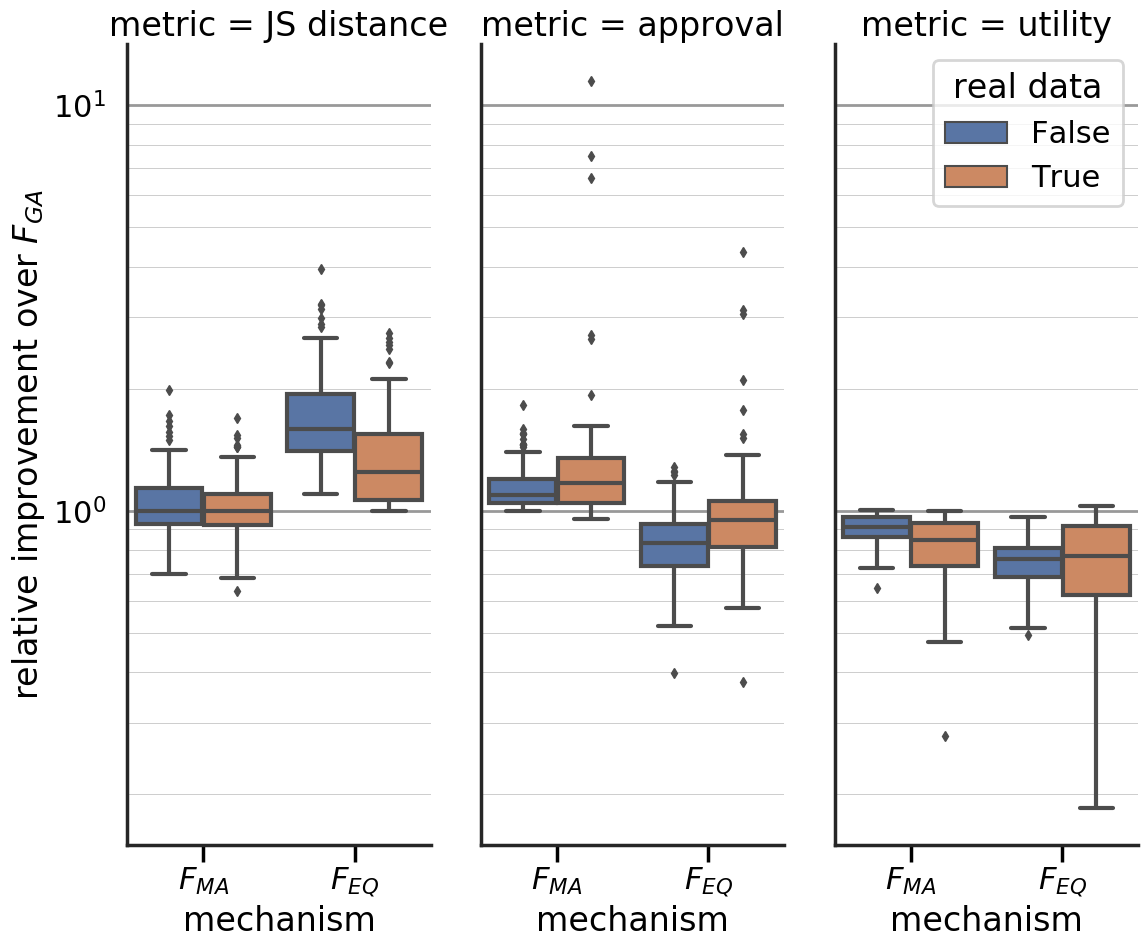

In [16]:
g = sns.catplot(x="mechanism", y=r'relative improvement over $F_{GA}$',
                hue="real data", col="metric",
                data=df, kind="box",
                height=10, aspect=.4, width=0.9,
                palette="deep", legend=False);
g.set(yscale="log")
g.tight_layout()
for ax in g.axes[0]:
    ax.grid(b=True, which='minor', color='k', linewidth=0.5, alpha=0.3)
plt.legend(loc='upper right',title='real data')
plt.show()

In [17]:
data = {'JS distance':[], 'mechanism':[], 'real data':[]}

stat = stats[1] 
data['JS distance'] += list(greedy_dict_gen[stat])
data['mechanism'] += [r'$F_{GA}$'] * len(greedy_dict_gen[stat])
data['real data'] += [False] * len(greedy_dict_gen[stat])
data['JS distance'] += list(max_dict_gen[stat])
data['mechanism'] += [r'$F_{MA}$'] * len(greedy_dict_gen[stat])
data['real data'] += [False] * len(greedy_dict_gen[stat])
data['JS distance'] += list(eq_dict_gen[stat])
data['mechanism'] += [r'$F_{EQ}$'] * len(greedy_dict_gen[stat])
data['real data'] += [False] * len(greedy_dict_gen[stat])

data['JS distance'] += list(greedy_dict[stat])
data['mechanism'] += [r'$F_{GA}$'] * len(greedy_dict[stat])
data['real data'] += [True] * len(greedy_dict[stat])
data['JS distance'] += list(max_dict[stat])
data['mechanism'] += [r'$F_{MA}$'] * len(greedy_dict[stat])
data['real data'] += [True] * len(greedy_dict[stat])
data['JS distance'] += list(eq_dict[stat])
data['mechanism'] += [r'$F_{EQ}$'] * len(greedy_dict[stat])
data['real data'] += [True] * len(greedy_dict[stat])
    
df2 = pd.DataFrame(data=data)

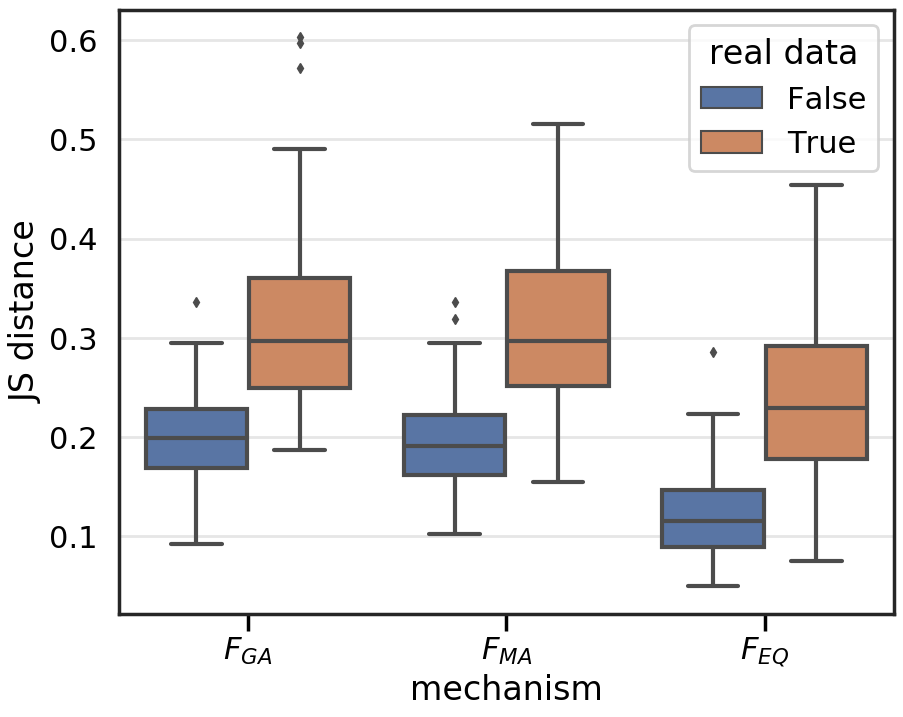

In [18]:
sns.set_theme(style="whitegrid")
sns.set_context("poster")
sns.set_style("ticks", {'xtick.color': '0', 
                        'axes.grid':True, 
                        'grid.color': '.9',
                        'axes.labelcolor':'0',
                        'text.color':'0',
                        'ytick.color': '0',
                        'ytick.left': False})

rcParams['figure.figsize'] = 10, 8

ax = sns.boxplot(x="mechanism", y='JS distance',
                hue="real data",
                data=df2, 
                width=0.8,
                palette="deep")
plt.show()


In [19]:
print(f"Number of times the outcome satisfied the weak axiom \n\
Real data\n\
F_EQ: {sum(eq_dict['weak axiom'])} \n\
F_MA: {sum(max_dict['weak axiom'])} \n\
F_GA: {sum(greedy_dict['weak axiom'])} \n\
Synthetic data\n\
F_EQ: {sum(eq_dict_gen['weak axiom'])} \n\
F_MA: {sum(max_dict_gen['weak axiom'])} \n\
F_GA: {sum(greedy_dict_gen['weak axiom'])}")

Number of times the outcome satisfied the weak axiom 
Real data
F_EQ: 0 
F_MA: 0 
F_GA: 3 
Synthetic data
F_EQ: 13 
F_MA: 0 
F_GA: 0


In [20]:
def u_r_ratio(profile, projects, pr=False):
    ballots, labels, costs, budget = profile.ballots, profile.labels, profile.costs, profile.budget
    projects = np.array(projects)

    n_clusters = max(labels) + 1
    clusters = [ballots[labels == i] for i in range(n_clusters)]
    u = np.array([np.sum(np.mean(cluster, 0)[projects]*costs[projects]) for cluster in clusters])
    r = np.array([len(cluster) for cluster in clusters]).astype(float)
    u /= sum(u)
    r /= len(ballots)
    
    return u/r

In [21]:
profile = Profile.load(f"gen_data//100000_20_liniear_1.pkl")

mechanism = Mechanism(profile)

projects = mechanism.solve("n_random_min_max_equitability")
eq_u_r = u_r_ratio(profile, projects)

projects = mechanism.solve("max_approval_DP")
ma_u_r = u_r_ratio(profile, projects)

projects = mechanism.solve("greedy_approval")
ga_u_r = u_r_ratio(profile, projects)

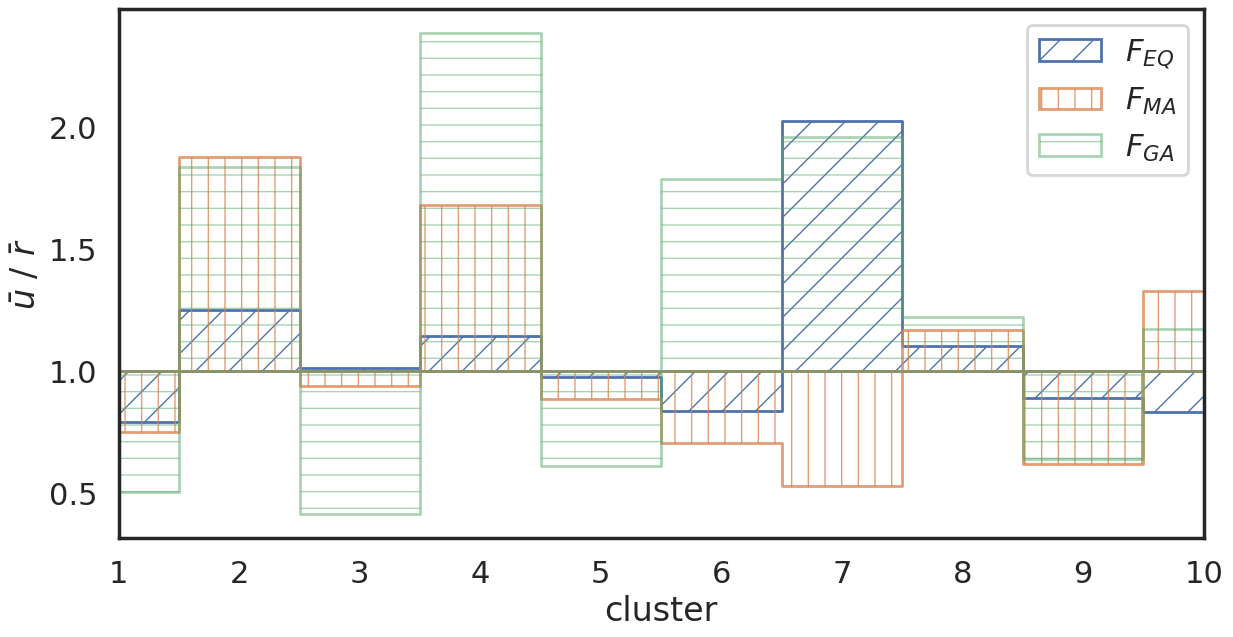

In [22]:
sns.set_theme(style="whitegrid")
sns.set_style("white")
sns.set_context("poster")

rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = 14, 7

color = sns.color_palette('deep')

plt.fill_between(range(1,11), (eq_u_r), 1, step='mid', alpha=1.0, facecolor="none", hatch="/", edgecolor=color[0], label=r"$F_{EQ}$")
plt.fill_between(range(1,11), (ma_u_r), 1, step='mid', alpha=0.8, facecolor="none", hatch="|", edgecolor=color[1], label=r"$F_{MA}$")
plt.fill_between(range(1,11), (ga_u_r), 1, step='mid', alpha=0.5, facecolor="none", hatch="-", edgecolor=color[2], label=r"$F_{GA}$")
plt.legend()
plt.xlim(1,10)
plt.xlabel("cluster")
plt.ylabel(r"$\bar{u}\ /\ \bar{r}$")
plt.show()


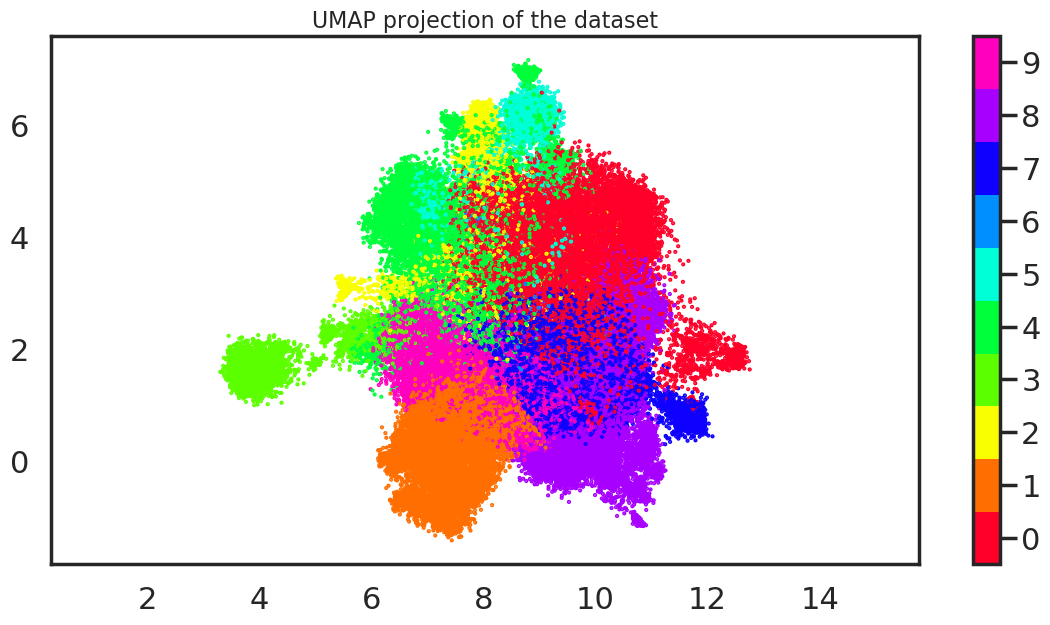

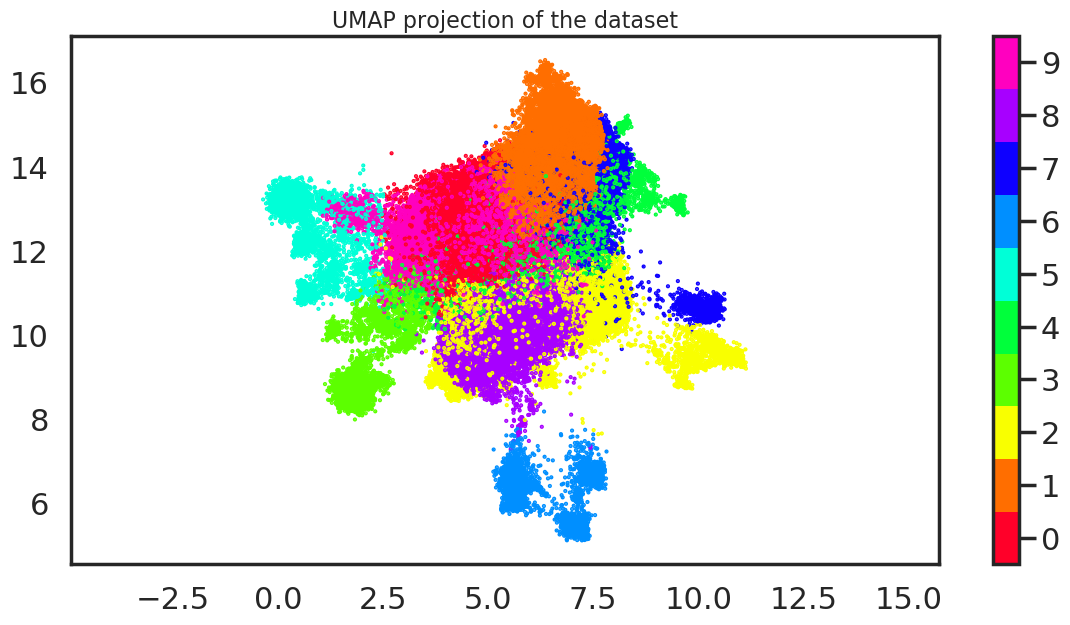

In [12]:
rcParams['figure.figsize'] = 14, 7
rcParams['figure.dpi'] = 100
rcParams.update({'font.size': 16})

n_clusters = max(profile.labels) + 1

plt.scatter(profile.embedding[:, 0], profile.embedding[:, 1], c=profile.labels, s=1, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(-1, n_clusters))
plt.title('UMAP projection of the dataset', fontsize=16)
plt.show()
plt.scatter(profile.embedding[:, 2], profile.embedding[:, 3], c=profile.labels, s=1, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(n_clusters+1)-0.5).set_ticks(np.arange(-1, n_clusters))
plt.title('UMAP projection of the dataset', fontsize=16)
plt.show()